- Title: Introduction to Linear Regression (early draft)
- Date: 2018-12-21
- Tags: statistics, regression, week9

The standard technique for measuring the relationship between one or more continuous independent variables and a continuous dependent variable is linear regression. 

The basic idea of linear regression can be expressed simply. A linear regression is a line (or some more dimensional geometric thingy) that maps the independent variables to the best predicted value for the dependent variable. 

Let's grab some data (we'll use the stuff from my book again to make it easy) and take a look at an example.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")

In [4]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


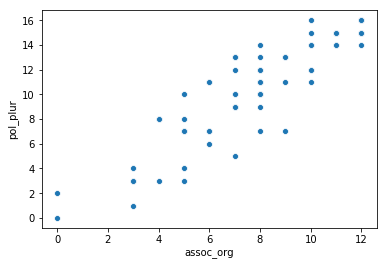

In [6]:
sns.scatterplot(df["assoc_org"], df["pol_plur"])

It looks like there's a strong relationship between these variables (which is to be expected---they're measures, of, respectively, a country's level of political pluralism and its protections for freedom of association---obviously, countries that respect people's freedom to join groups are likely to get more diverse groups!)

The idea of linear regression is: suppose we draw a straight line, the *regression line*, through that graph in such a way as to minimize the distance between the line and the data points on there.  (We actually minimize the squared distances, for mathematical reasons we won't bother with here.)

As you may recall from middle school, lines are described by an equation of the form 

$$y=mx+b$$

which translates to "for everything on the x axis, multiply its value by m and then add b, and you get the corresponding value for the y axis."

The equation describing our regression line will represent our best prediction for values of y, given values of x. And the distances we minimize are the errors for that prediction, also known as the *residuals*.


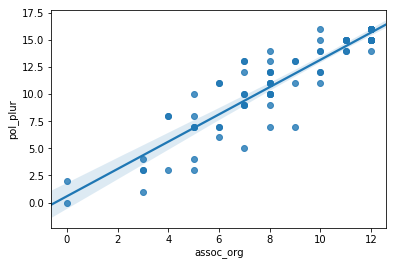

In [7]:
sns.regplot(df["assoc_org"], df["pol_plur"])

We can see that our line carves right down the middle of our data.

We can also get the equation for the line in the form of a regression model.

In [8]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='pol_plur ~ assoc_org', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               pol_plur   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     481.8
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.11e-37
Time:                        22:41:46   Log-Likelihood:                -174.68
No. Observations:                  91   AIC:                             353.4
Df Residuals:                      89   BIC:                             358.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5877      0.524      1.122      0.2

We'll talk about what most of this stuff means, but for now, just look down into the second sub-table where it says "Intercept" and "assoc_org".  The first column of that table provides the coefficients.  Where assoc_org is x and pol_plur is y, this is equivalent to saying that the regression line is 

$$y = 1.2551x + 0.5877$$

and if you look at the chart, that looks about right.  (Let's put a grid on there to make it clearer)

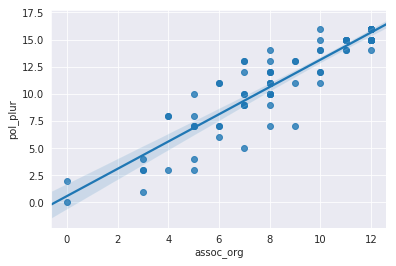

In [9]:
with sns.axes_style("darkgrid"):
    sns.regplot(df["assoc_org"], df["pol_plur"])

You see how, for example, 10 on the x axis hits the regression line just a little bit above 12.5 (should be around 13) on the y axis.  Our linear regression looks about right.

The string formula in the call to statsmodels, incidentally, is just the easiest way to compose a regression in Python. `smf.ols(formula='pol_plur ~ assoc_org', data=df)` means "run an ordinary least squares (ols) regression with pol_plur as the dependent, or y, variable, and assoc_org as the independent variable.  [Here's a description of how that formula system works](https://www.statsmodels.org/dev/example_formulas.html)

The great thing about regression is that we don't have to limit ourselves to one variable.  Here's something we can do: 

In [11]:
multi = smf.ols(formula='pol_plur ~ assoc_org + free_expr', data=df)
multires = multi.fit()
print(multires.summary())

                            OLS Regression Results                            
Dep. Variable:               pol_plur   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     289.1
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           2.07e-39
Time:                        23:04:16   Log-Likelihood:                -167.12
No. Observations:                  91   AIC:                             340.2
Df Residuals:                      88   BIC:                             347.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7985      0.597     -1.338      0.1

Here, the coefficients have the same meaning, they just describe a plane rather than a line, of the form $y = mx + nz + b$ where we've added z to for free_expr, and n= 0.4086.

This is the plane that minimizes squared distance between itself and the data we have, but now in three dimensions.

Note that the coefficients on assoc_org and the intercept have changed. This is to be expected.  Conceptually, what this is doing is capturing the relationship between each of the independent variables x and z, if we held the other one constant. 

[to be contined]